# Initialize

In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class 
import math

In [2]:
# font = {'size'   : 16, 'family':'STIXGeneral'}
# axislabelfontsize='large'
# matplotlib.rc('font', **font)
# plt.rcParams["figure.figsize"] = [8.0,8.0]
font = {'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

# a simple conversion from cl's to dl's
def l_to_dl(lp):
    return lp*(lp+1.)/2./np.pi

In [3]:
Planck = {'name': 'Planck',
          'do_cib': 1, 'do_tsz': 1, 'do_cibxtsz': 1,
          'freq_cib': [100., 143., 217., 353., 545., 857.],
          'cc': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'cc_cibmean': np.array([1.076, 1.017, 1.119, 1.097, 1.068, 0.995, 0.960]),
          'freq_cibmean': np.array([100., 143., 217., 353., 545., 857.]),
          'fc': np.ones(7),
          }


In [4]:

combo_cosmo = {

    
                   'H0':67.556,
                   'omega_b':0.022032,
                   'omega_cdm':0.12038,
                   # 'sigma8': 0.831,
                   'ln10^{10}A_s': 3.047,
                   'n_s': 0.9665,
                   'tau_reio':0.0925,
                   # Take fixed value for primordial Helium (instead of automatic BBN adjustment)
                   'YHe':0.246,
}

In [5]:
%%time
M = Class()
output_str = 'cib_cib_1h,cib_cib_2h'
output_str += ',lens_cib_1h,lens_cib_2h'
output_str += ',gal_gal_1h,gal_gal_2h'
output_str += ',gal_lens_1h,gal_lens_2h'
output_str += ',gallens_lens_1h,gallens_lens_2h'
output_str += ',gallens_gallens_1h,gallens_gallens_2h'
output_str += ',tSZ_gallens_1h,tSZ_gallens_2h'
output_str += ',gal_gallens_1h,gal_gallens_2h'
output_str += ',gal_cib_1h,gal_cib_2h'
output_str += ',gallens_cib_1h,gallens_cib_2h'
output_str += ',tSZ_1h,tSZ_2h'
output_str += ',lens_1h,lens_2h'
output_str += ',tSZ_gal_1h,tSZ_gal_2h'
output_str += ',tSZ_lens_1h,tSZ_lens_2h'
output_str += ',tSZ_cib_1h,tSZ_cib_2h'
M.set({'output':output_str})
M.set(combo_cosmo)
M.set({

'mass function' : 'T08M200c',
'use_maniyar_cib_model':1,

'maniyar_cib_etamax' : 5.12572945e-01,

'maniyar_cib_zc' : 1.5,
'maniyar_cib_tau' : 8.25475287e-01,
'maniyar_cib_fsub' : 0.134*np.log(10.),
'Most_efficient_halo_mass_in_Msun' : 5.34372069e+12,
'Size_of_halo_masses_sourcing_CIB_emission' :  1.5583436676980493,
#for the Lsat tabulation:
'freq_min': 100,
'freq_max': 600,
'dlogfreq' : 0.3,

'concentration parameter':'B13', # this sets it to 5

'n_z_L_sat' :50,
'n_m_L_sat' :50,
'n_nu_L_sat':10,

'use_nc_1_for_all_halos_cib_HOD': 1,

'sub_halo_mass_function' : 'TW10',#'JvdB14',
'M_min_subhalo_in_Msun' : 1e5, # 1e5 see https://github.com/abhimaniyar/halomodel_cib_tsz_cibxtsz/blob/master/Cell_cib.py
'use_redshift_dependent_M_min': 0,
'M_min' : 1e10,
'M_max' : 1e15,
'z_min' : 0.05,
'z_max' : 5.,
'ell_min': 2.,
'ell_max':8000,
'dlogell':0.2,


'ndim_redshifts': 50,
'ndim_masses':100,

'has_cib_flux_cut': 0,
'hm_consistency':1,

# 'epsabs_L_sat': 1e-40,
# 'epsrel_L_sat': 1e-9,

# "P_k_max_1/Mpc": 50.,
# 'k_max_for_pk_class_sz':50.
    
    
    
'use_fft_for_profiles_transform' : 1,
    
    
'damping_1h_term' : 0,
    
# 'x_min_gas_density_fftw' : 1e-5,
# 'x_max_gas_density_fftw' : 1e2,
    
# 'n_k_pressure_profile' :50, # this is l/ls # default 80
# 'n_m_pressure_profile' :30, # default: 100, decrease for faster
# 'n_z_pressure_profile' :30, # default: 100, decrease for faster

# 'x_min_gas_pressure_fftw' : 1e-5,
# 'x_max_gas_pressure_fftw' : 1e2,
    
    
# 'k_min_samp_fftw' : 1e-3,
# 'k_max_samp_fftw' : 1e3,
# 'N_samp_fftw' : 1024,
})

M.set({
       'cib_frequency_list_num' : 1,
       'cib_frequency_list_in_GHz' : '150',
      })
M.compute_class_szfast()

/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/IPython/core/magics/execution.py:1330: DeprecationWarning: compute_class_szfast is deprecated. Use initialize_classy_szfast instead.
  out = eval(code_2, glob, local_ns)
/Users/boris/venvdir/class_sz_312_brew/lib/python3.12/site-packages/mcfit/mcfit.py:130: UserWarning: use backend='jax' if desired
  warnings.warn("use backend='jax' if desired")


CPU times: user 3min 13s, sys: 2.41 s, total: 3min 15s
Wall time: 23.4 s


In [6]:
specs_dict = {
'cib x cib' : M.cl_cib_cib()['150x150'],
'cib x kc' : M.cl_lens_cib()['150'],
'g x cib' : M.cl_gal_cib()['150'],
'g x g' : M.cl_gg(),
'g x kc' : M.cl_kg(),
'kg x kg' : M.cl_kg_kg(),
'kg x g' : M.cl_ggamma(),
'y x y' : M.cl_sz(),
'g x y' : M.cl_yg(),
'y x kc' : M.cl_y_kcmb(),
'kc x kc' : M.cl_kk(),
'cib x y' : M.cl_tSZ_cib()['150'],
'kg x kc' : M.cl_kg_k(),
'kg x y' : M.cl_ykg(),
'kg x cib' : M.cl_kg_cib()['150'],
}

In [7]:
plot_keys = ['kc x kc',
             'y x kc',
             'y x y',
             'cib x kc',
             'cib x y',
             'cib x cib',
             'g x kc',
             'g x y',
             'g x cib',
             'g x g',
             'kg x kc',
             'kg x y',
             'kg x cib',
             'kg x g',
             'kg x kg']

plot_keys_latex = [r'$\kappa_\mathrm{cmb}$ x $\kappa_\mathrm{cmb}$',r'$y$ x $\kappa_{cmb}$',
             r'$y$ x $y$',r'$\mathrm{CIB}$ x $\kappa_\mathrm{cmb}$',
             r'$\mathrm{CIB}$ x $y$',r'$\mathrm{CIB}$ x $\mathrm{CIB}$',
             r'$\delta_g$ x $\kappa_\mathrm{cmb}$',r'$\delta_g$ x $y$',r'$\delta_g$ x $\mathrm{CIB}$',r'$\delta_g$ x $\delta_g$',r'$\kappa_{g}$ x $\kappa_\mathrm{cmb}$',r'kg x $y$',r'$\kappa_{g}$ x $\mathrm{CIB}$',
             r'$\kappa_{g}$ x $\delta_g$',r'$\kappa_{g}$ x $\kappa_{g}$']

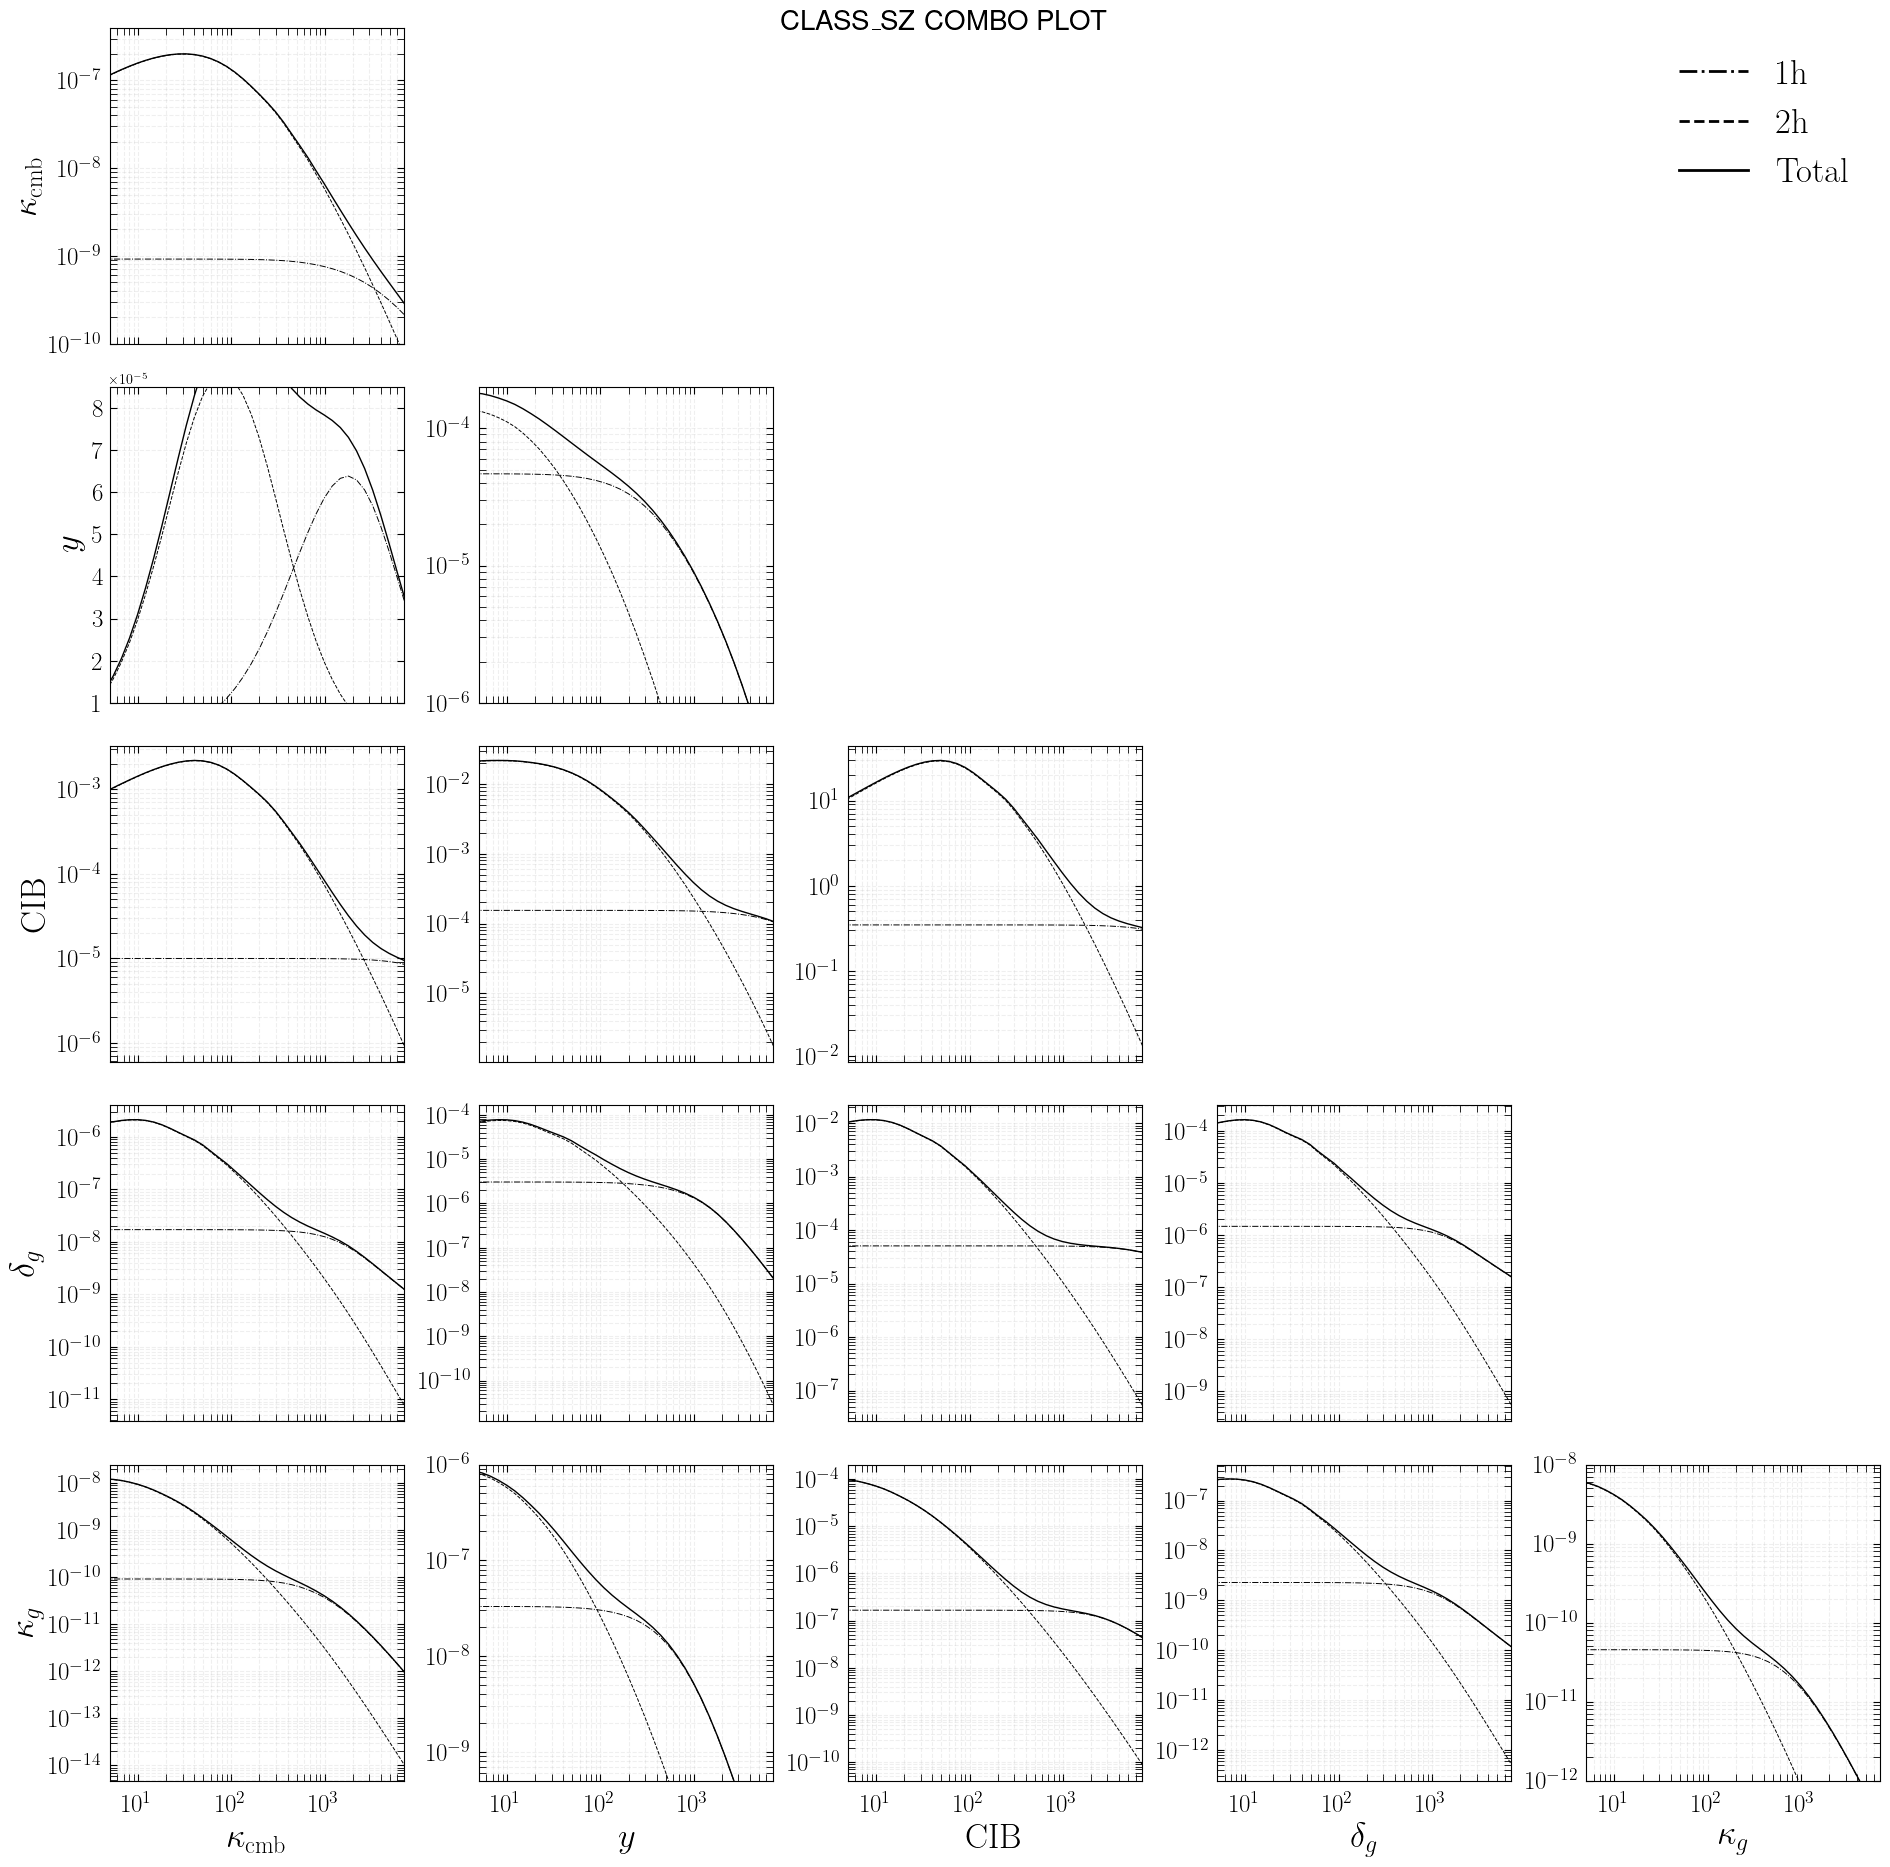

In [8]:
from matplotlib.lines import Line2D
# cl_cib_cib = M.cl_cib_cib()
# freq = ['100', '143', '217', '353', '545', '857']
# # freq = ['545']
# # nu1, nu2 = 4, 4
# # plot_Cell(ell, cl1h_cib, cl2h_cib, nu1, nu2, freq, 'CIB')
# two_halo = cl2h_cib
# one_halo = cl1h_cib
# faccib = 1.

plot_dim = int(1/2*(-1 + np.sqrt(1 + 8*len(plot_keys))))
# plot_dim = len(freq)
fig, axes = plt.subplots(figsize=(19, 19),
                         sharex=True,
                         #sharey=True,
                         ncols=plot_dim,
                         nrows=plot_dim)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.0,
                    hspace=0.0)
ik = 0
for i in range(plot_dim):
    for j in range(plot_dim):
        if i==0 and j==(plot_dim-1):
            ax = axes[i, j]
            custom_lines = [Line2D([0], [0], color='k', lw=2,ls='-.'),
                            Line2D([0], [0], color='k', lw=2,ls='--'),
                            Line2D([0], [0], color='k', lw=2,ls='-')]
            ax.legend(custom_lines, [r'$\mathrm{1h}$', r'$\mathrm{2h}$', r'$\mathrm{Total}$'],
                      fontsize=25,frameon=False)
            # ax.legend()
            ax.axis('off')
        elif i<j:
            axes[i, j].axis('off')
        else:
            ax = axes[i, j]
            clsp = specs_dict[plot_keys[ik]]
            if j==0:
                # ax.set_ylabel(r'$\mathrm{C_l}\: [\mathrm{Jy}^2\: \mathrm{sr}^{-1}]$', fontsize=12)
                ax.set_ylabel(plot_keys_latex[ik].split(' x ')[0], fontsize=25)
            if i==(plot_dim-1):
                ax.set_xlabel(plot_keys_latex[ik].split(' x ')[1], fontsize=25)
            
            ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
            ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
            ax.xaxis.set_ticks_position('both')
            ax.yaxis.set_ticks_position('both')
            plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=18)
            plt.setp(ax.get_xticklabels(), fontsize=18)
            ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xlim(5,7000)
            if clsp:
                # print(plot_keys[ik],clsp)
                l = np.asarray(clsp['ell'])
                # ax.plot(l[l>5.],np.asarray(clsp['1h']/l_to_dl(l))[l>5.],ls='-.',c='k',label='class_sz 1h ')
                ax.plot(l,np.asarray(clsp['1h']/l_to_dl(l)),ls='-.',c='k',label='class_sz 1h',lw=0.7)
                ax.plot(l,clsp['2h']/l_to_dl(l),ls='--',c='k',label='class_sz 2h',lw=0.7)
                ax.plot(l,clsp['2h']/l_to_dl(l)+np.asarray(clsp['1h']/l_to_dl(l)),ls='-',c='k',label='class_sz Total',lw=1)

            # if freqs=='100' and freqsp=='100':
                # ax.set_ylim(5e-3,5)
            if plot_keys[ik] == 'kc x kc':
                ax.set_ylim(1e-10,4e-7)
            if plot_keys[ik] == 'y x kc':
                ax.set_ylim(1e-5,8.5e-5)
                ax.set_yscale("linear")
            if plot_keys[ik] == 'y x y':
                ax.set_ylim(1e-6,2e-4)
            if plot_keys[ik] == 'kg x kg':
                ax.set_ylim(1e-12,1e-8)
            if plot_keys[ik] == 'kg x y':
                ax.set_ylim(5e-10,1e-6)
            ik+=1
 
fig.suptitle('CLASS_SZ COMBO PLOT',fontsize=20)
fig.tight_layout()

# plt.savefig('figures/class_sz_combo.pdf')